## 1. 从微博爬取相关数据

In [1]:
#录入正常用户的ID，IDZC和抑郁症用户的ID,IDYY
IDZC = [5686659045, 5070488897, 2236649864, 5481842586, 1799285021,1641367807, 6079669733, 1810427660, 1786644137, 1922022240, 2306947451, 2891878750, 1889607690,3199441861,2396116183,6016630245,1639478840,2850644073,5239210616,2890692204,1943101785,1781022931,5948804520,2687922693,1730957060,2878473932,5484858683, 1800755655, 6142602122, 1740924090, 3340623142, 2437733093, 5577646140, 3962982466, 3025511543, 2009288583, 1787333644, 5634925497]
IDYY = [6992648962,5104887647,2795669352, 6456834915, 5904448518,6136894270,6052939320,6146626040,5844111799, 6735998426,5328608161,6795029367]
print(len(IDZC))
print(len(IDYY))

38
12


In [ ]:
#数据准备

import urllib.request
import json
from w3lib.html import remove_tags


#设置代理IP
proxy_addr="122.241.72.191:808"

#定义页面打开函数
def use_proxy(url,proxy_addr):
    req=urllib.request.Request(url)
    req.add_header("User-Agent","Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/49.0.2623.221 Safari/537.36 SE 2.X MetaSr 1.0")
    proxy=urllib.request.ProxyHandler({'http':proxy_addr})
    opener=urllib.request.build_opener(proxy,urllib.request.HTTPHandler)
    urllib.request.install_opener(opener)
    data=urllib.request.urlopen(req).read().decode('utf-8','ignore')
    return data

#获取微博主页的containerid，爬取微博内容时需要此id
def get_containerid(url):
    data=use_proxy(url,proxy_addr)
    content=json.loads(data).get('data')
    for data in content.get('tabsInfo').get('tabs'):
        if(data.get('tab_type')=='weibo'):
            containerid=data.get('containerid')
    return containerid

#获取微博内容信息,并保存到文本中，内容包括：每条微博的内容、微博详情页面地址、点赞数、评论数、转发数等
def get_weibo(id,file):
    i=1
    while True:
        url='https://m.weibo.cn/api/container/getIndex?type=uid&value='+str(id)
        weibo_url='https://m.weibo.cn/api/container/getIndex?type=uid&value='+str(id)+'&containerid='+get_containerid(url)+'&page='+str(i)
        try:
            data=use_proxy(weibo_url,proxy_addr)
            content=json.loads(data).get('data')
            cards=content.get('cards')
            if(len(cards)>0) and i<13 :
                for j in range(len(cards)):
                    print("-----正在爬取第"+str(i)+"页，第"+str(j)+"条微博------")
                    card_type=cards[j].get('card_type')
                    if(card_type==9):
                        mblog=cards[j].get('mblog')
                        text=mblog.get('text')
                        text=remove_tags(text)
                        created_at=mblog.get('created_at')
                        with open(file,'a',encoding='utf-8') as fh:
                            fh.write(text+"\n")
                i+=1
            else:
                break
        except Exception as e:
            print(e)
            pass

In [ ]:
#爬取抑郁症患者微博
if __name__=="__main__":
    IDYY = [6992648962,5104887647,2795669352, 6456834915, 5904448518,6136894270,6052939320,6146626040,5844111799, 6735998426,5328608161,6795029367]
    for id in IDYY:
        file=str(id)+".txt"
        get_weibo(id,file)

In [ ]:
#爬取非抑郁症患者微博
if __name__=="__main__":
    IDZC = [5686659045, 5070488897, 2236649864, 5481842586, 1799285021,1641367807, 6079669733, 1810427660, 1786644137, 1922022240, 2306947451, 2891878750, 1889607690,3199441861,2396116183,6016630245,1639478840,2850644073,5239210616,2890692204,1943101785,1781022931,5948804520,2687922693,1730957060,2878473932,5484858683, 1800755655, 6142602122, 1740924090, 3340623142, 2437733093, 5577646140, 3962982466, 3025511543, 2009288583, 1787333644, 5634925497]
    for id in IDZC:
        file=str(id)+".txt"
        get_weibo(id,file)

## 2. 微博情感分析

In [ ]:
#第一步
#准备情感词典

#哀
AI = {}

#恶
E = {}

#惊
JING = {}

#惧
JU = {}

#怒
NU = {}

#否定词
noword = []

#副词
adverb = {}

#无用词
stopword = []

#情感词
file3 = open(r'E:\大学\research\crj\心理\proposal1\NLP自然语言处理\词典\情感词典及对应分数\哀.csv',"r", encoding ='utf-8')
senList = file3.readlines()
for s in senList:
    try:
        s = s.replace('\r\n','').replace('\n','')
        AI[s.split(',')[0]] = s.split(',')[1]
    except:
        pass
#恶
file3 = open(r'E:\大学\research\crj\心理\proposal1\NLP自然语言处理\词典\情感词典及对应分数\恶.csv',"r", encoding ='utf-8')
senList = file3.readlines()
for s in senList:
    try:
        s = s.replace('\r\n','').replace('\n','')
        E[s.split(',')[0]] = s.split(',')[1]
    except:
        pass
#惊
file3 = open(r'E:\大学\research\crj\心理\proposal1\NLP自然语言处理\词典\情感词典及对应分数\惊.csv',"r", encoding ='utf-8')
senList = file3.readlines()
for s in senList:
    try:
        s = s.replace('\r\n','').replace('\n','')
        JING[s.split(',')[0]] = s.split(',')[1]
    except:
        pass
#惧
file3 = open(r'E:\大学\research\crj\心理\proposal1\NLP自然语言处理\词典\情感词典及对应分数\惧.csv',"r", encoding ='utf-8')
senList = file3.readlines()
for s in senList:
    try:
        s = s.replace('\r\n','').replace('\n','')
        JU[s.split(',')[0]] = s.split(',')[1]
    except:
        pass
#怒
file3 = open(r'E:\大学\research\crj\心理\proposal1\NLP自然语言处理\词典\情感词典及对应分数\怒.csv',"r", encoding ='utf-8')
senList = file3.readlines()
for s in senList:
    try:
        s = s.replace('\r\n','').replace('\n','')
        NU[s.split(',')[0]] = s.split(',')[1]
    except:
        pass
#否定词
file4 = open(r'E:\大学\research\crj\心理\proposal1\NLP自然语言处理\词典\否定词词典\deny_adv.txt',"r", encoding ='utf-8')
notList = file4.readlines()
for s in notList:
    try:
        s = s.replace('\r\n','').replace('\n','')
        noword.append(s)
    except:
        print ("数据错误："+s)
#频率副词
file5 = open(r'E:\大学\research\crj\心理\proposal1\NLP自然语言处理\词典\程度副词词典\程度词语.txt',"r")
degreeList = file5.readlines() 
for s in degreeList:
    try:
        s = s.replace('\r\n','').replace('\n','')
        adverb[s.split('\t')[0]] = s.split('\t')[1]
    except:
        print ("数据错误："+s)
#停用词
file2 = open(r'E:/大学/research/crj/心理/proposal1/NLP自然语言处理/词典/停用词词典/stopwords-master/stopwords.txt',"r", encoding ='utf-8')
stopwords = file2.readlines()
for s in stopwords:
    try:
        s = s.replace('\r\n','').replace('\n','')
        stopword.append(s) 
    except:
        print ("数据错误："+s)

In [51]:
#第二步
#清理文本+打分
def givescore(sentence):
    wordsList = jieba.cut(sentence, cut_all=False)
    newWords = {}
    i = 0
    for w in wordsList:
        if w not in stopword:
            newWords[str(i)] =w
            i = i+1

    AIWord = {}
    EWord = {}
    JINGWord = {}
    JUWord = {}
    NUWord = {}
    notWord = {}
    degreeWord = {}
    m = 0
    #这里就相当于是senwords或者degreeword的话就给予相应的评分（例如这句话里出现了 微 这个字，对应的是2分），
    #是notword的话就给予-1，啥都不是的话就是0.
    for index in newWords.keys():
        if newWords[index] in AI.keys() and newWords[index] not in noword and newWords[index] not in adverb.keys():
            AIWord[index] = AI[newWords[index]]
        elif newWords[index] in E.keys() and newWords[index] not in noword and newWords[index] not in adverb.keys():
            EWord[index] = E[newWords[index]]
        elif newWords[index] in JING.keys() and newWords[index] not in noword and newWords[index] not in adverb.keys():
            JINGWord[index] = JING[newWords[index]]
        elif newWords[index] in JU.keys() and newWords[index] not in noword and newWords[index] not in adverb.keys():
            JUWord[index] = JU[newWords[index]]
        elif newWords[index] in NU.keys() and newWords[index] not in noword and newWords[index] not in adverb.keys():
            NUWord[index] = NU[newWords[index]]
        elif newWords[index] in noword and newWords[index] not in adverb.keys():
            notWord[index] = -1
        elif newWords[index] in adverb.keys():
            degreeWord[index] = adverb[newWords[index]]
    W = 1
    score = []
    # 存所有情感词的位置的列表
    AILoc = []
    ELoc = []
    JINGLoc = []
    JULoc = []
    NULoc = []
    notLoc = []
    degreeLoc = []


    for i in AIWord.keys():
        AILoc.append(int(i))
    for i in EWord.keys():
        ELoc.append(int(i))
    for i in JINGWord.keys():
        JINGLoc.append(int(i))
    for i in JUWord.keys():
        JULoc.append(int(i))
    for i in NUWord.keys():
        NULoc.append(int(i))
    for i in notWord.keys():
        notLoc.append(int(i))
    for i in degreeWord.keys():
        degreeLoc.append(int(i))

    AILoc.sort()
    ELoc.sort()
    JINGLoc.sort()
    JULoc.sort()
    NULoc.sort()
    notLoc.sort()
    degreeLoc.sort()

    AIloc = -1
    Eloc = -1
    JINGloc = -1
    JUloc = -1
    NUloc = -1
    
    AIscore = 0
    Escore = 0
    JINGscore = 0
    JUscore = 0
    NUscore = 0

    for i in range(0, len(newWords)):
        if i in AILoc:
            AIloc += 1
            AIscore += W * float(AIWord[str(i)])
            if AIloc < len(AILoc) - 1:
                if AILoc[AIloc] - AILoc[AIloc + 1] > 1:
                    for j in range(AILoc[AIloc]+1, AILoc[AIloc + 1]):
                        if j in notLoc:
                            W *= -1
                        elif j in degreeLoc:
                            W *= float(degreeWord[j])
                else:
                    W = 1
        if AIloc < len(AILoc) - 1:
            i = AILoc[AIloc + 1]

    for i in range(0, len(newWords)):
        if i in ELoc:
            Eloc += 1
            Escore += W * float(EWord[str(i)])
            if Eloc < len(ELoc) - 1:
                if ELoc[Eloc] - ELoc[Eloc + 1] > 1:
                    for j in range(ELoc[Eloc]+1, ELoc[Eloc + 1]):
                        if j in notLoc:
                            W *= -1
                        elif j in degreeLoc:
                            W *= float(degreeWord[j])
                else:
                    W = 1
        if Eloc < len(ELoc) - 1:
            i = ELoc[Eloc + 1]

    for i in range(0, len(newWords)):
        if i in JINGLoc:
            JINGloc += 1
            JINGscore += W * float(JINGWord[str(i)])
            if JINGloc < len(JINGLoc) - 1:
                if JINGLoc[JINGloc] - JINGLoc[JINGloc + 1] > 1:
                    for j in range(JINGLoc[JINGloc]+1, JINGLoc[JINGloc + 1]):
                        if j in notLoc:
                            W *= -1
                        elif j in degreeLoc:
                            W *= float(degreeWord[j])
                else:
                    W = 1
        if JINGloc < len(JINGLoc) - 1:
            i = JINGLoc[JINGloc + 1]

    for i in range(0, len(newWords)):
        if i in JULoc:
            JUloc += 1
            JUscore += W * float(JUWord[str(i)])
            if JUloc < len(JULoc) - 1:
                if JULoc[JUloc] - JULoc[JUloc + 1] > 1:
                    for j in range(JULoc[JUloc]+1, JULoc[JUloc + 1]):
                        if j in notLoc:
                            W *= -1
                        elif j in degreeLoc:
                            W *= float(degreeWord[j])
                else:
                    W = 1
        if JUloc < len(JULoc) - 1:
            i = JULoc[JUloc + 1]

    for i in range(0, len(newWords)):
        if i in NULoc:
            NUloc += 1
            NUscore += W * float(NUWord[str(i)])
            if NUloc < len(NULoc) - 1:
                if NULoc[NUloc] - NULoc[NUloc + 1] > 1:
                    for j in range(NULoc[NUloc]+1, NULoc[NUloc + 1]):
                        if j in notLoc:
                            W *= -1
                        elif j in degreeLoc:
                            W *= float(degreeWord[j])
                else:
                    W = 1
        if NUloc < len(NULoc) - 1:
            i = NULoc[NUloc + 1]   
            
    score.append(AIscore)#/len(AILoc))
    score.append(Escore)#/len(ELoc))
    score.append(JINGscore)#/len(JINGLoc))
    score.append(JUscore)#/len(JULoc))
    score.append(NUscore)#/len(NULoc))
    
    
    return score


In [71]:
#第三步
#抑郁症打分+输出csv文件
import pandas as pd
IDYY = [6992648962,5104887647,2795669352, 6456834915, 5904448518,6136894270,6052939320,6146626040,5844111799, 6735998426,5328608161,6795029367]

scoredict = {}

for i in IDYY:
    n = 1
    file = open(r'E:/大学/research/crj/心理/proposal1/raw data/抑郁12人/'+ str(i) +'.txt' ,"r", encoding ='utf-8')
    userdata = file.readlines()
    for data in userdata:
        scoredict[str(i)+': '+ str(n)] = givescore(data)
        n += 1
scoredf = pd.DataFrame(pd.Series(scoredict),columns=['score'])
scoredf = scoredf.reset_index().rename(columns = {'index':'index'})
scoredf["depression"] = 1
scoredf.to_csv("抑郁打分"+".csv",index=False)

In [72]:
#第四步
#非抑郁症打分+输出csv文件
import pandas as pd
IDZC = [5686659045, 5070488897, 2236649864, 5481842586, 1799285021,1641367807, 6079669733, 1810427660, 1786644137, 1922022240, 2306947451, 2891878750, 1889607690,3199441861,2396116183,6016630245,1639478840,2850644073,5239210616,2890692204,1943101785,1781022931,5948804520,2687922693,1730957060,2878473932,5484858683, 1800755655, 6142602122, 1740924090, 3340623142, 2437733093, 5577646140, 3962982466, 3025511543, 2009288583, 1787333644, 5634925497]
scoredict = {}

for i in IDZC:
    n = 1
    file = open(r'E:/大学/research/crj/心理/proposal1/raw data/非抑郁38人/'+ str(i) +'.txt' ,"r", encoding ='utf-8')
    userdata = file.readlines()
    for data in userdata:
        scoredict[str(i)+': '+ str(n)] = givescore(data)
        n += 1
scoredf = pd.DataFrame(pd.Series(scoredict),columns=['score'])
scoredf = scoredf.reset_index().rename(columns = {'index':'index'})
scoredf["depression"] = 0
scoredf.to_csv("非抑郁打分"+".csv",index=False)

## 3 多元逻辑回归

In [ ]:
"""
逻辑回归
因变量：
depression: 二分变量、 1表示此微博由抑郁症患者发出、0表示此微博由非抑郁症患者发出

自变量：
微博内容情感分析：
SAD：连续变量、表示此微博在悲伤这一情感上获得的分数
DIS：连续变量、表示此微博在厌恶这一情感上获得的分数
FER: 连续变量、表示此微博在恐惧这一情感上获得的分数
ANG: 连续变量、表示此微博在愤怒这一情感上获得的分数

用户自我表露水平：
PIC: 连续变量、表示用户在给定时间段内发布图片的数量
FLW: 连续变量、表示用户的关注人数
DCP: 连续变量、表示用户的个人简介的字数

用户特征：
GEN: 二分变量、0表示发布此微博的用户为女性、1表示发布此微博的用户为男性
LOC: 分类变量、地址信息，1表示未获取准确的地址、2表示北京、3表示广州等
"""

In [1]:
import os
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

#pd.set_option('display.max_columns', None)
os.chdir(r"E:/大学/research/crj/心理/proposal1/abstract/data")

In [2]:
# 导入数据
data = pd.read_csv(r'cleaned data.csv', skipinitialspace=True)
data.head()

,index,num,depression,SAD,DIS,FER,ANG,PIC,GEN,LOC,wbcount,FLW,fans,description,DCP,des
0,5686659045,1,0,0,0,0,0,79,0,1,2046,252,15870,0,0,0
1,5686659045,2,0,0,0,0,0,79,0,1,2046,252,15870,0,0,0
2,5686659045,3,0,0,0,0,0,79,0,1,2046,252,15870,0,0,0
3,5686659045,4,0,0,9,0,0,79,0,1,2046,252,15870,0,0,0
4,5686659045,5,0,0,0,0,0,79,0,1,2046,252,15870,0,0,0


In [5]:
# •随机抽样，建立训练集与测试集
train = data.sample(frac=0.7, random_state=1234).copy()
test = data[~ data.index.isin(train.index)].copy()
print(' 训练集样本量: %i \n 测试集样本量: %i' %(len(train), len(test)))


 训练集样本量: 3748 
 测试集样本量: 1606


In [ ]:
#3使用向前逐步法从备选变量中选择变量，构建基于AIC的最优模型，绘制ROC曲线，同时检验模型的膨胀系数。

In [3]:
# 变量筛选
# 向前法
def forward_select(data, response):
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = float('inf'), float('inf')
    while remaining:
        aic_with_candidates=[]
        for candidate in remaining:
            formula = "{} ~ {}".format(
                response,' + '.join(selected + [candidate]))
            aic = smf.glm(
                formula=formula, data=data, 
                family=sm.families.Binomial(sm.families.links.logit)
            ).fit().aic
            aic_with_candidates.append((aic, candidate))
        aic_with_candidates.sort(reverse=True)
        best_new_score, best_candidate=aic_with_candidates.pop()
        if current_score > best_new_score: 
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
            print ('aic is {},continuing!'.format(current_score))
        else:        
            print ('forward selection over!')
            break
            
    formula = "{} ~ {} ".format(response,' + '.join(selected))
    print('final formula is {}'.format(formula))
    model = smf.glm(
        formula=formula, data=data, 
        family=sm.families.Binomial(sm.families.links.logit)
    ).fit()
    return(model)

In [11]:
candidates = ["depression", "SAD", 'DIS','FER','ANG','PIC','LOC','GEN','FLW','DCP']
data_for_select = train[candidates]

lg = forward_select(data=data_for_select, response = 'depression')
lg.summary()

aic is 2553.0840825920613,continuing!
aic is 1584.827525634258,continuing!
aic is 1459.9036156959028,continuing!
aic is 1390.919600592002,continuing!
aic is 1292.7426850984725,continuing!
aic is 1278.4438890971546,continuing!
forward selection over!
final formula is depression ~ LOC + FLW + GEN + PIC + DCP + DIS 


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             depression   No. Observations:                 3748
Model:                            GLM   Df Residuals:                     3741
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -632.22
Date:                Wed, 22 Apr 2020   Deviance:                       1264.4
Time:                        15:24:42   Pearson chi2:                 1.16e+03
No. Iterations:                     9   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.7744      0.436     17.827      0.000       6.920       8.629
LOC           -1.2685      0.072    -17.610      0.000      -1.410      -1.127
FLW           -0.0138      0.001    -16.652      0.000      -0.015      -0.012
GEN           -0.3178      0.258     -1.231      0.218      -0.824       0.188
PIC           -0.0263      0.003     -9.902      0.000      -0.031      -0.021
DCP           -0.0921      0.011     -8.751      0.000      -0.113      -0.072
DIS            0.0784      0.020      3.895      0.000       0.039       0.118
==============================================================================
"""

In [7]:
def vif(df, col_i):
    from statsmodels.formula.api import ols
    
    cols = list(df.columns)
    cols.remove(col_i)
    cols_noti = cols
    formula = col_i + '~' + '+'.join(cols_noti)
    r2 = ols(formula, df).fit().rsquared
    return 1. / (1. - r2)

In [9]:
exog = train[candidates].drop(['depression'], axis=1)

for i in exog.columns:
    print(i, '\t', vif(df=exog, col_i=i))

SAD 	 1.00349097283763
DIS 	 1.0300485708315161
FER 	 1.004286614573935
ANG 	 1.0024592888973172
PIC 	 1.3565246635630852
LOC 	 1.416226589480272
GEN 	 1.1260604377262784
FLW 	 1.3205907699059143
DCP 	 1.2226850266097566


In [12]:
#无共线问题

In [13]:
#预测
train['proba'] = lg.predict(train)
test['proba'] = lg.predict(test)

test['proba'].head()

3     0.838412
7     0.719318
10    0.719318
15    0.719318
16    0.719318
Name: proba, dtype: float64

In [14]:
# ## 模型评估

In [15]:
# 设定阈值

test['prediction'] = (test['proba'] > 0.5).astype('int')

In [17]:
# 混淆矩阵

pd.crosstab(test.depression, test.prediction, margins=True)

prediction,0,1,All
depression,,,
0,1219,44,1263
1,107,236,343
All,1326,280,1606


In [19]:
# - 计算准确率
acc = sum(test['prediction'] == test['depression']) /np.float(len(test))
print('The accurancy is %.2f' %acc)

The accurancy is 0.91


In [21]:
for i in np.arange(0.1, 0.9, 0.1):
    prediction = (test['proba'] > i).astype('int')
    confusion_matrix = pd.crosstab(prediction,test.depression,
                                   margins = True)
    precision = confusion_matrix.ix[0, 0] /confusion_matrix.ix['All', 0]
    recall = confusion_matrix.ix[0, 0] / confusion_matrix.ix[0, 'All']
    Specificity = confusion_matrix.ix[1, 1] /confusion_matrix.ix[1,'All']
    f1_score = 2 * (precision * recall) / (precision + recall)
    print('threshold: %s, precision: %.2f, recall:%.2f ,Specificity:%.2f , f1_score:%.2f'%(i, precision, recall, Specificity,f1_score))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


threshold: 0.1, precision: 0.77, recall:1.00 ,Specificity:0.54 , f1_score:0.87
threshold: 0.2, precision: 0.88, recall:0.97 ,Specificity:0.68 , f1_score:0.92
threshold: 0.30000000000000004, precision: 0.91, recall:0.95 ,Specificity:0.72 , f1_score:0.93
threshold: 0.4, precision: 0.94, recall:0.95 ,Specificity:0.78 , f1_score:0.95
threshold: 0.5, precision: 0.97, recall:0.92 ,Specificity:0.84 , f1_score:0.94
threshold: 0.6, precision: 0.97, recall:0.91 ,Specificity:0.86 , f1_score:0.94
threshold: 0.7000000000000001, precision: 0.97, recall:0.91 ,Specificity:0.87 , f1_score:0.94
threshold: 0.8, precision: 1.00, recall:0.90 ,Specificity:0.99 , f1_score:0.94


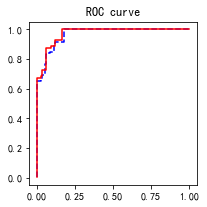

In [22]:
# - 绘制ROC曲线
import sklearn.metrics as metrics

fpr_test, tpr_test, th_test = metrics.roc_curve(test.depression, test.proba)
fpr_train, tpr_train, th_train = metrics.roc_curve(train.depression, train.proba)

plt.figure(figsize=[3, 3])
plt.plot(fpr_test, tpr_test, 'b--')
plt.plot(fpr_train, tpr_train, 'r-')
plt.title('ROC curve')
plt.show()

In [23]:
print('AUC = %.4f' %metrics.auc(fpr_test, tpr_test))

AUC = 0.9660
